# White wine data analysis

## 1. Data Exploration

In [1]:
import csv
with open('winequality-white.csv', 'r') as f:
    wine = list(csv.reader(f, delimiter=';'))
    wine_features = wine[0][:11]
    print('Input Attributes:\n\n',wine_features)

Input Attributes:

 ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']


In [2]:
import numpy as np
wine_records = np.array(wine[1:], dtype=np.float)
wine_data = wine_records[:,:11]
print(wine_data.shape)
wine_target = wine_records[:,11:]
print(wine_target.shape)

(4898, 11)
(4898, 1)


In [3]:
# check for missing values is any
print(np.isnan(wine_data).any())

False


### 1.1 Statistics of the Dataset

In [4]:
# check for anomalies in the attributes
statistics = np.zeros((11,4))
for i in range(11):
    statistics[i][0] = np.amin(wine_data[:,i])
    statistics[i][1] = np.amax(wine_data[:,i])
    statistics[i][2] = np.median(wine_data[:,i])
    statistics[i][3] = np.std(wine_data[:,i])
import pandas as pd
print('Structure of Dataset:\n\n',pd.DataFrame(statistics,index=wine_features,columns=['Min','Max','Median','SD']))

Structure of Dataset:

                           Min        Max     Median         SD
fixed acidity         3.80000   14.20000    6.80000   0.843782
volatile acidity      0.08000    1.10000    0.26000   0.100784
citric acid           0.00000    1.66000    0.32000   0.121007
residual sugar        0.60000   65.80000    5.20000   5.071540
chlorides             0.00900    0.34600    0.04300   0.021846
free sulfur dioxide   2.00000  289.00000   34.00000  17.005401
total sulfur dioxide  9.00000  440.00000  134.00000  42.493726
density               0.98711    1.03898    0.99374   0.002991
pH                    2.72000    3.82000    3.18000   0.150985
sulphates             0.22000    1.08000    0.47000   0.114114
alcohol               8.00000   14.20000   10.40000   1.230495


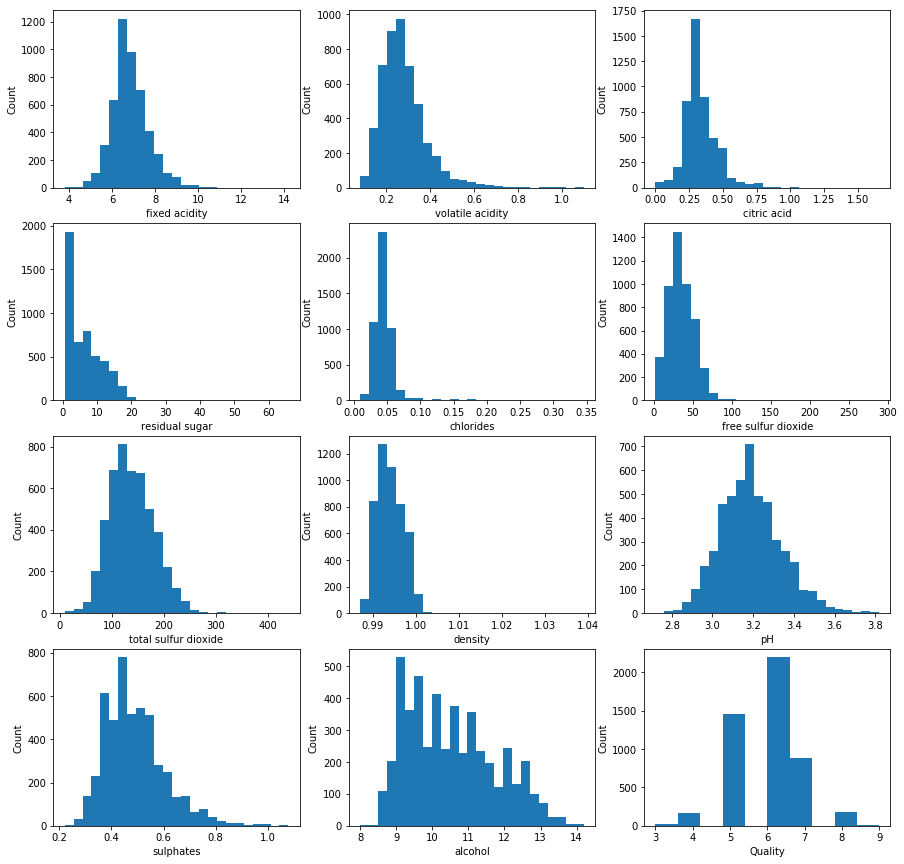

In [5]:
# histogram plot of each input attribute and the output-'Quality'
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(4, 3, figsize=(15, 15))
k = 0

for i in range(4):
    for j in range(3):
        if k<11:
            ax[i,j].hist(wine_data[:,k], bins=25)
            ax[i,j].set(xlabel=wine_features[k], ylabel="Count")
            k += 1
        else:
            ax[i,j].hist(wine_target)
            ax[i,j].set(xlabel="Quality", ylabel="Count")

### Observation from the data statistics and the plots shown above
- Fixed acidity, density and pH are normally distributed
- volatile acidity, citric acid, sulphates and alcohol has got some outliers
- residual sugar, free sulfur dioxide, total sulfur dioxide and chloride has got extreme outliers

### 1.2 Relationship between each attribute and the output

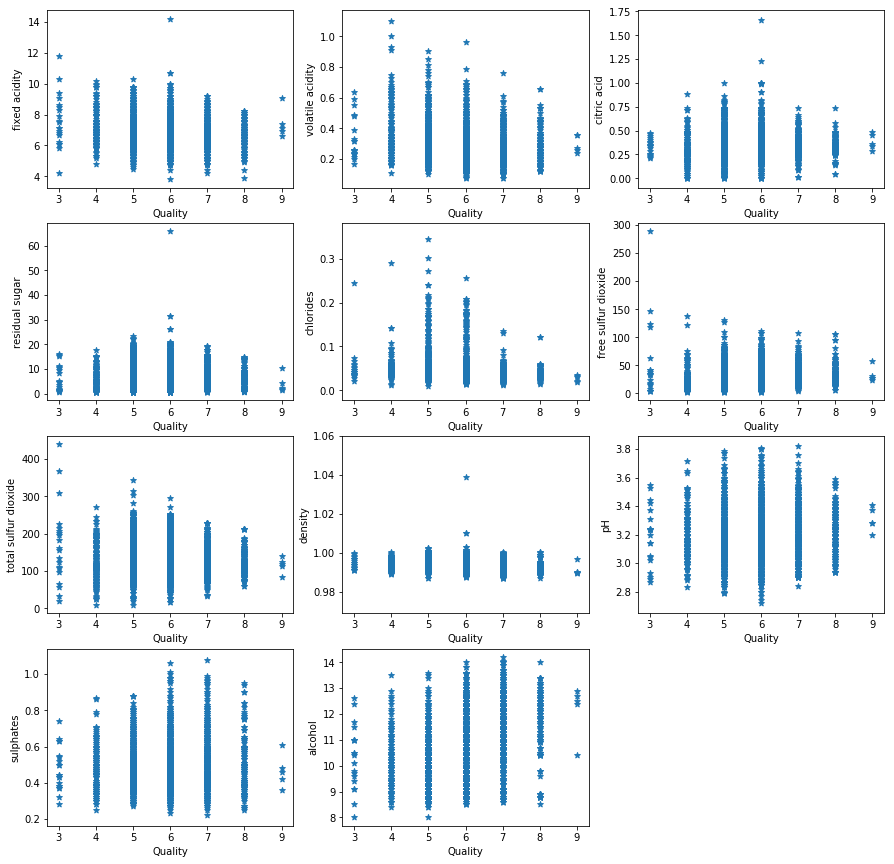

In [6]:
fig, ax = plt.subplots(4, 3, figsize=(15, 15))
k = 0
for i in range(4):
    for j in range(3):
        if k<11:
            ax[i,j].scatter(wine_target,wine_data[:,k],marker='*')
            ax[i,j].set(xlabel="Quality", ylabel=wine_features[k])
        else:
            ax[i,j].set_visible(False)
        k += 1

### Observations-

- negative relaionship with fixed acidity
- strong positive correlation with alcohol
- slight positive correlation with pH
- slight negative correlation with density, chlorides
- no significant relation with volatile acidity, citric acid, sulphates, total sulfur dioxide, free sulfur dioxide, residual sugar

### 1.3 Relationship between the atttributes

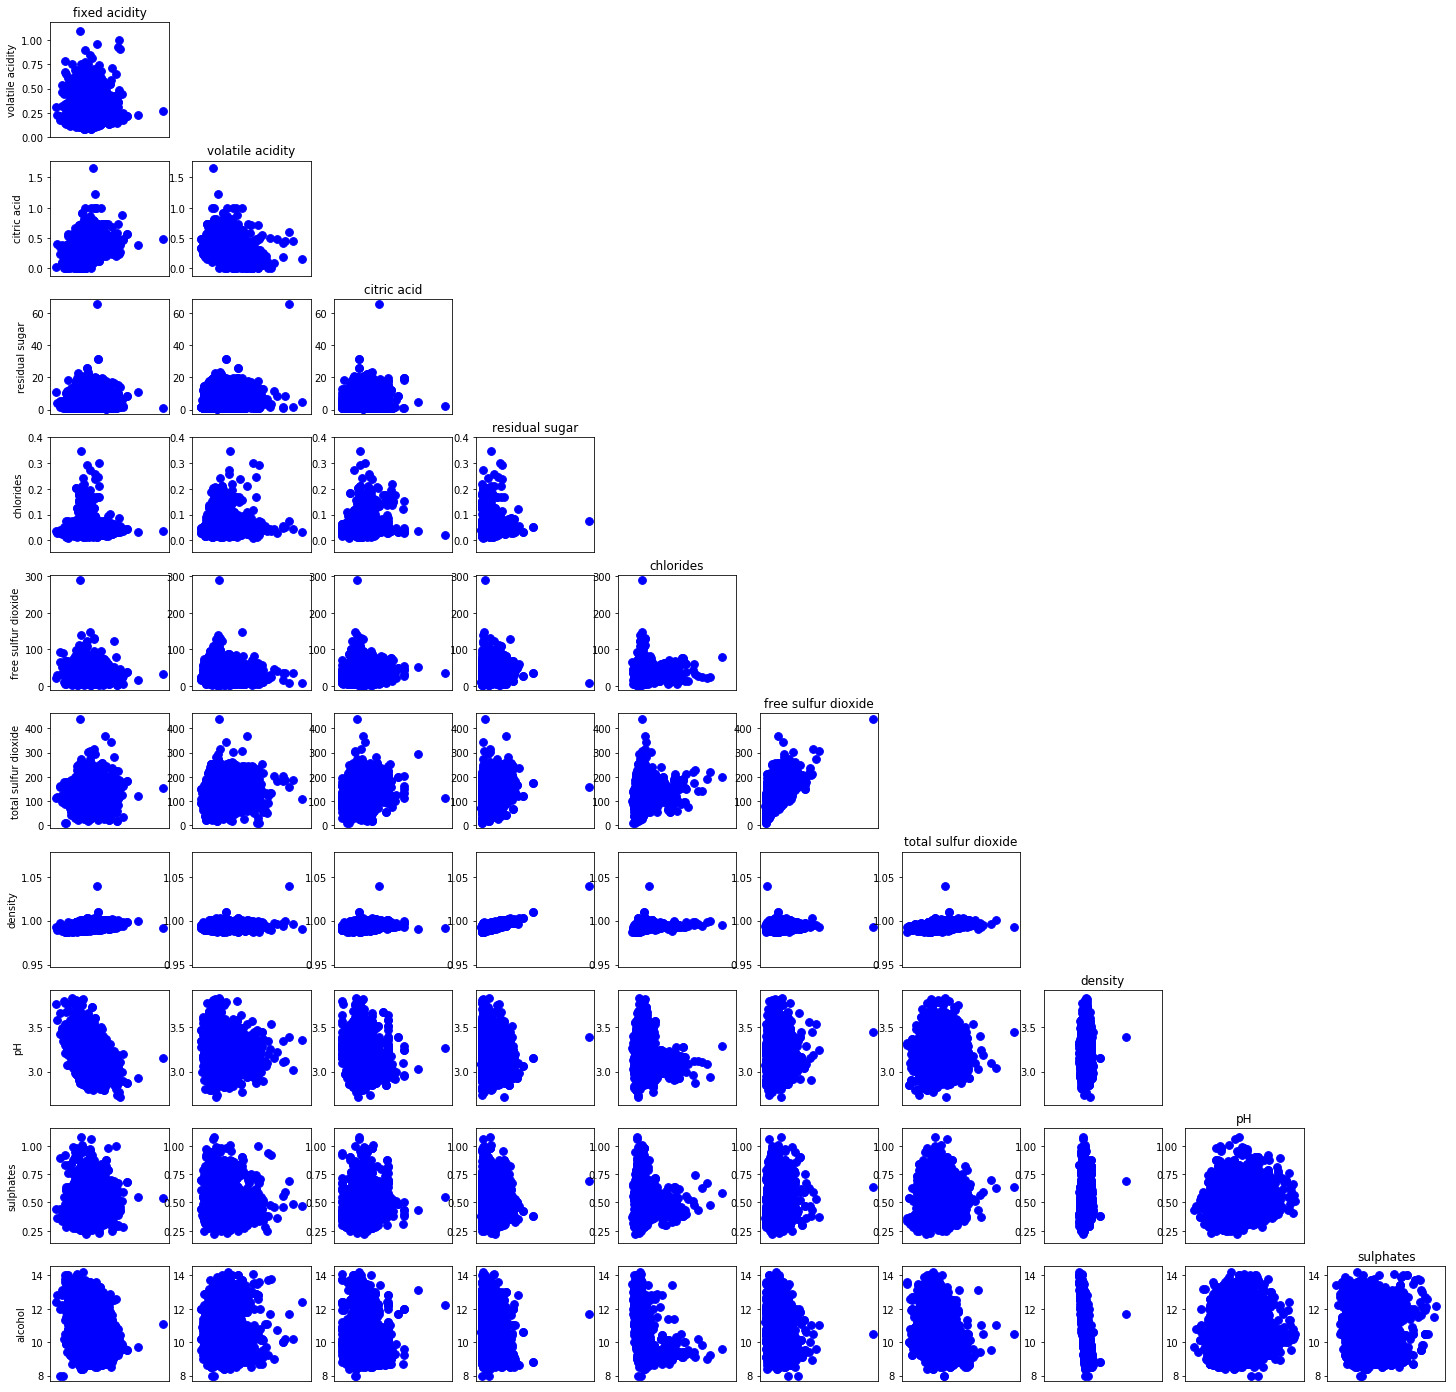

In [7]:
fig, ax = plt.subplots(10, 10, figsize=(25, 25))

for i in range(10):
    for j in range(10):
        ax[i,j].scatter(wine_data[:,j], wine_data[:,i+1], c='b', s=60)
        if j==i:
            ax[i,j].set_title(wine_features[j])
        if j==0:
            ax[i,j].set_ylabel(wine_features[i+1])
        ax[i,j].set_xticks(())
        if j > i:
            ax[i,j].set_visible(False)

### Observations-

- fixed acidity: +ve with citric acid, -ve with pH
- residual sugar: +ve with density
- free sulfur dioxide: slight +ve with total sulfur dioxide, -ve wih alcohol

### 1.4 Correlation between the attributes and the output

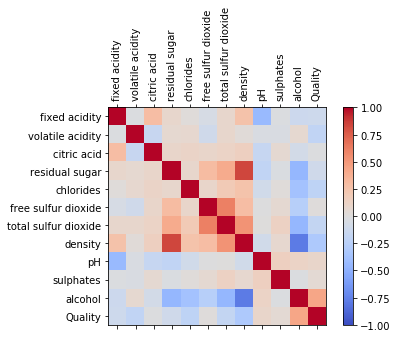

In [8]:
full_features = np.append(wine_features,'Quality')
#print(full_features)
data = pd.DataFrame(wine_records,columns=full_features)
corr = data.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(data.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(data.columns)
ax.set_yticklabels(data.columns)
plt.show()

### Observations-

- fixed acidity: +ve with citric acid and density, -ve with pH
- volatile acidity: -ve with citric acid and quality
- citric acid: +ve with fixed acidity, -ve with volatile acidity and pH
- residual sugar: +ve with sulfur dioxide and density, -ve with alcohol and pH
- chlorides: -ve with alcohol and quality
- total sulfur dioxide: +ve with free sulfur dioxide, -ve with alcohol and quality
- densiy: +ve with residual sugar and sulfur dioxide, -ve with alcohol and quality
- pH: -ve with fixed acidity, citric acid and residual sugar
- alcohol: +ve with quality, -ve with density, residual sugar, sulfur dioxide and chlorides
- quality: +ve with alcohol, -ve with density, total sulfur dioxide, volatile acidity and chlorides

## 2. Data Exploitation

Fitting the SVM model on the original dataset

In [9]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
import numpy as np
X_train_orig, X_test_orig, y_train, y_test = train_test_split(wine_data, wine_target, random_state=0)
svm = SVC()
print('Cross-validation score: ',np.mean(cross_val_score(svm, X_train_orig, y_train)))
svm.fit(X_train_orig, y_train)
print('Training set score:     ',svm.score(X_train_orig, y_train))
print('Test set score          ',svm.score(X_test_orig, y_test))

Cross-validation score:  0.5516037817260311
Training set score:      0.825755513204465
Test set score           0.5436734693877551


Performance of our model is very low and it overfits the training set.

To improve:
- Divide our target 'Quality' variable into smaller categories
- As already observed that the scale of input variables vary largely, so we will use normalisation for a better performance

In [10]:
q75, q25 = np.percentile(wine_target, [75 ,25])
iqr = q75 - q25
print('Min:',np.amin(wine_target))
print('Max:',np.amax(wine_target))
print('Med:',np.median(wine_target))
print('Std:',np.std(wine_target))
print('Quartiles:',q75,q25,iqr)

Min: 3.0
Max: 9.0
Med: 6.0
Std: 0.8855481621683543
Quartiles: 6.0 5.0 1.0


Based on the above statistics we will divide the output into 3 classes:
- Low : [3-5)
- Medium : [5,6]
- High : (6-9]

Text(0, 0.5, 'Count')

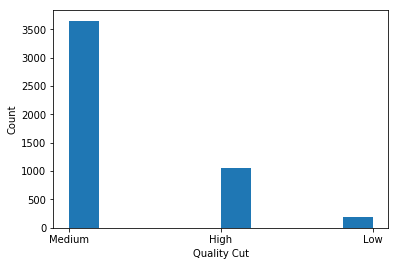

In [11]:
wine_target_cut = list(map(lambda x: 'Medium' if x>=5 and x<=6 else ('Low' if x<5 else 'High'),wine_target))
plt.hist(wine_target_cut)
plt.xlabel('Quality Cut')
plt.ylabel('Count')

In [12]:
X_train_orig, X_test_orig, y_train, y_test = train_test_split(wine_data, wine_target_cut, random_state=0)
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
pipe = make_pipeline(StandardScaler(), SVC())
param_grid = {'svc__C': [1, 2, 3, 4, 5], 'svc__gamma': [0.1, 0.5, 1.0, 1.5, 2.0]}
grid = GridSearchCV(pipe, param_grid=param_grid, cv=5)
grid.fit(X_train_orig, y_train)
print("Best cross-validation accuracy:", grid.best_score_)
print("Training set score:            ", grid.score(X_train_orig, y_train))
print("Test set score:                ", grid.score(X_test_orig, y_test))
print("Best parameters:               ", grid.best_params_)

Best cross-validation accuracy: 0.8325619384699156
Training set score:             0.9961884018513477
Test set score:                 0.8106122448979591
Best parameters:                {'svc__C': 3, 'svc__gamma': 1.0}


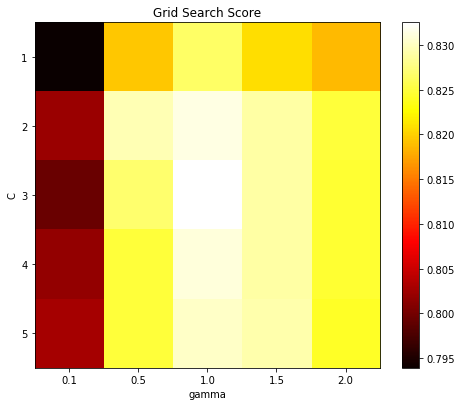

In [14]:
scores = grid.cv_results_['mean_test_score'].reshape(5,5)
plt.figure(figsize=(8, 6))
plt.subplots_adjust(left=.2, right=0.95, bottom=0.15, top=0.95)
plt.imshow(scores, interpolation='nearest', cmap=plt.cm.hot)
plt.xlabel('gamma')
plt.ylabel('C')
plt.colorbar()
plt.xticks(np.arange(5), [0.1, 0.5, 1.0, 1.5, 2.0])
plt.yticks(np.arange(5), [1, 2, 3, 4, 5])
plt.title('Grid Search Score')
plt.show()

As seen our model's performance has increased to an acceptable measure